# Step 1: Data preprocessing

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize

In [3]:
business_df = pd.read_json(
    "data/raw_data/yelp_academic_dataset_business.json", lines=True
)

In [4]:
business_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
# Size of the dataset, it has 100K rows and 14 Columns
business_df.shape

(150346, 14)

In [6]:
# Brief information on the columns
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [7]:
# Info for numerical columns of the dataset
business_df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [8]:
# Null values in the dataset
null_perc = (business_df.isnull().sum() / business_df.isnull().count()) * 100
null_perc

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.141580
categories       0.068509
hours           15.446370
dtype: float64

Maximum NA values are present for the hours column and few for attributes and categories

In [9]:
# Replace string 'None' with NaN and drop it using dropna function
business_df.replace("None", np.nan, inplace=True)
business_df.dropna(inplace=True)
business_df.shape

(117618, 14)

In [26]:
business_df["attributes"].isnull().sum()

0

In [27]:
null_perc = (business_df.isnull().sum() / business_df.isnull().count()) * 100
null_perc

business_id     0.0
name            0.0
address         0.0
city            0.0
state           0.0
postal_code     0.0
latitude        0.0
longitude       0.0
stars           0.0
review_count    0.0
is_open         0.0
attributes      0.0
categories      0.0
hours           0.0
dtype: float64

In [28]:
business_df["categories"] = business_df["categories"].apply(
    lambda x: sorted(x.split(",")) if x is not None else list()
)

In [29]:
business_df["categories"].head()

1    [ Local Services,  Mailbox Centers,  Notaries,...
2    [ Electronics,  Fashion,  Furniture Stores,  H...
3    [ Bakeries,  Bubble Tea,  Coffee & Tea,  Food,...
4                        [ Breweries,  Food, Brewpubs]
5    [ Fast Food,  Food,  Ice Cream & Frozen Yogurt...
Name: categories, dtype: object

In [30]:
review_df = pd.read_json("yelp_academic_dataset_review.json", lines=True)
review_df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [31]:
review_df.shape, review_df.business_id.nunique()

((6990280, 9), 150346)

In [33]:
from wordcloud import WordCloud, STOPWORDS

review_text = " ".join(review_df["text"].values)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    stopwords=stopwords,
    min_font_size=10,
).generate(review_text)

In [ ]:
def remove_stopwords(text):
    if not pd.isnull(text):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords]
        return " ".join(filtered_words)
    return text


review_df["cleaned_text"] = review_df["text"].apply(remove_stopwords)

In [6]:
review_df = review_df.drop(columns=["useful", "funny", "cool"])

In [7]:
business_df = business_df[
    business_df.categories.fillna("-").str.lower().str.contains("restaurant")
]

In [8]:
combined_df = review_df.merge(
    business_df, on="business_id", suffixes=(" review", " business")
)
combined_df.head(1)

,review_id,user_id,business_id,stars review,text,date,name,address,city,state,postal_code,latitude,longitude,stars business,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."


In [9]:
combined_df.shape

(4724684, 19)

In [10]:
combined_df["state"].value_counts()

state
PA     1100276
FL      792141
LA      558347
TN      434709
MO      354613
IN      335843
AZ      267088
NV      243649
CA      211748
NJ      171206
ID      100082
AB       68882
DE       49159
IL       36870
NC          29
HI          19
CO          12
MT           6
XMS          5
Name: count, dtype: int64

In [11]:
combined_df["categories"] = (
    combined_df["categories"]
    .str.replace("Restaurants", "")
    .str.replace("Fast Food", "Fast_Fd")
    .str.replace("Food", "")
)
business_cats = ", ".join(combined_df["categories"].dropna())
cats = pd.DataFrame(business_cats.split(", "), columns=["category"])
cats = cats[cats != ""]

len(cats)

26091701

In [12]:
cats.head()

,category
0,NaN
1,Breakfast & Brunch
2,NaN
3,Juice Bars & Smoothies
4,American (New)


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724684 entries, 0 to 4724683
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   review_id       object        
 1   user_id         object        
 2   business_id     object        
 3   stars review    int64         
 4   text            object        
 5   date            datetime64[ns]
 6   name            object        
 7   address         object        
 8   city            object        
 9   state           object        
 10  postal_code     object        
 11  latitude        float64       
 12  longitude       float64       
 13  stars business  float64       
 14  review_count    int64         
 15  is_open         int64         
 16  attributes      object        
 17  categories      object        
 18  hours           object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(12)
memory usage: 684.9+ MB


In [14]:
business_cats = ", ".join(combined_df["categories"].dropna())
cats = pd.DataFrame(business_cats.split(", "), columns=["category"])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)
cats_df.head()

,category,count
0,,6138180
1,Nightlife,1373993
2,Bars,1324752
3,American (Traditional),1011646
4,American (New),984540


In [15]:
cats_df = cats_df[cats_df["category"] != ""]
cats_df = cats_df[cats_df["category"] != "Cocktail Bars"]
cats_df = cats_df[cats_df["category"] != "Sushi Bars"]
cat_to_keep = cats_df["category"].unique()
cat_to_keep

array(['Nightlife', 'Bars', 'American (Traditional)', 'American (New)',
       'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Pizza', 'Burgers',
       'Italian', 'Mexican', 'Event Planning & Services', 'Salad',
       'Coffee & Tea', 'Cafes', 'Cajun/Creole', 'Steakhouses', 'Desserts',
       'Fast_Fd', 'Chinese', 'Japanese', 'Southern', 'Specialty ',
       'Barbeque', 'Caterers', 'Pubs', 'Asian Fusion', 'Wine & Spirits',
       'Beer', 'Vegetarian', 'Sports Bars', 'Wine Bars', 'Chicken Wings',
       'Diners', 'Bakeries', 'Arts & Entertainment', 'Delis',
       'Mediterranean', 'Venues & Event Spaces', 'Gluten-Free', 'Vegan',
       'Thai', 'Gastropubs', 'Beer Bar', 'Comfort ', 'Soup', 'Lounges',
       'French', 'Vietnamese', 'Latin American', 'Juice Bars & Smoothies',
       'Tacos', 'Local Flavor', 'Tapas/Small Plates', 'Music Venues',
       'Breweries', 'Tex-Mex', 'Indian', 'Ice Cream & Frozen Yogurt',
       'Greek', 'Middle Eastern', 'Soul ', 'Ethnic ', 'Hotels & Travel',
   

C:\Users\risha\AppData\Local\Temp\ipykernel_24840\4223102332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)
C:\Users\risha\AppData\Local\Temp\ipykernel_24840\4223102332.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)


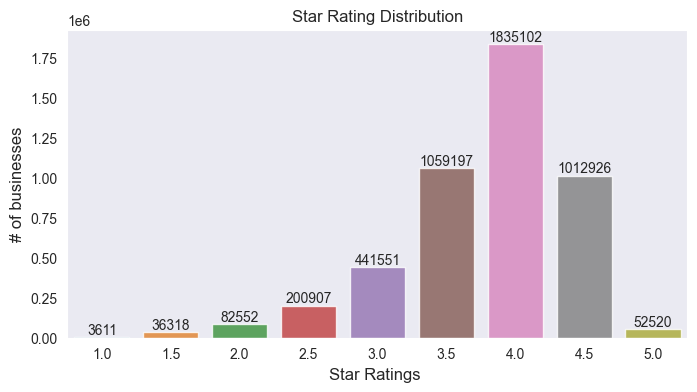

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style("dark")

# Get the distribution of the ratings
x = combined_df["stars business"].value_counts()
x = x.sort_index()
# plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=color)
plt.title("Star Rating Distribution")
plt.ylabel("# of businesses", fontsize=12)
plt.xlabel("Star Ratings ", fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

There are  729  different types/categories of Businesses in Yelp!


C:\Users\risha\AppData\Local\Temp\ipykernel_24840\649970559.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)#,color=color[5])
C:\Users\risha\AppData\Local\Temp\ipykernel_24840\649970559.py:13: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)#,color=color[5])


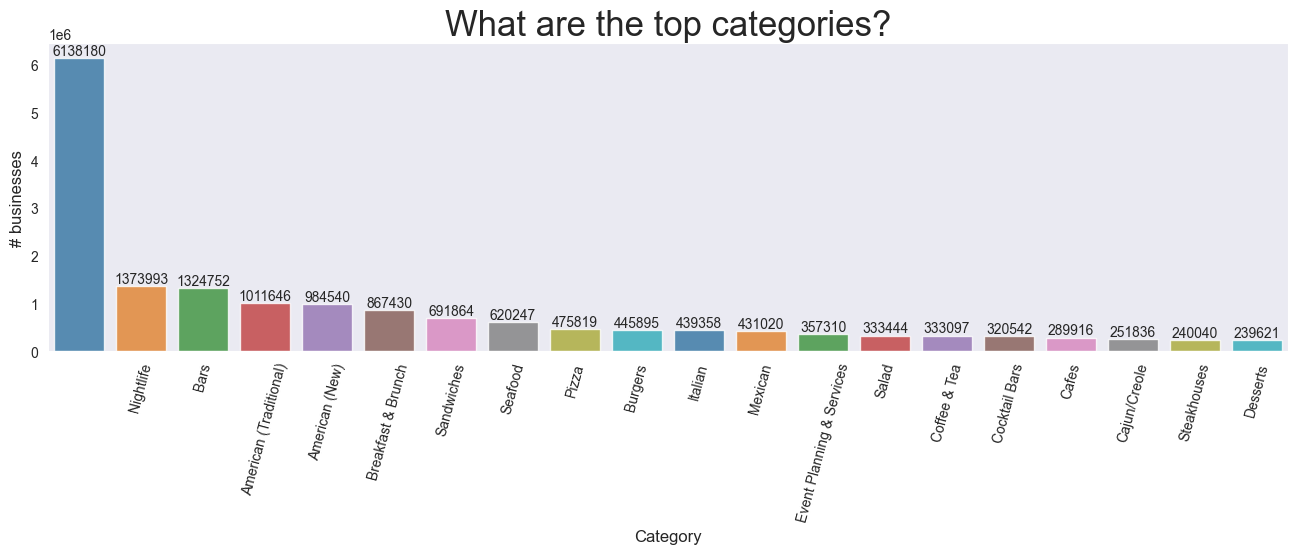

In [17]:
# What are the popular business categories?
business_cats = ", ".join(combined_df["categories"].dropna())

cats = pd.DataFrame(business_cats.split(", "), columns=["category"])
x = cats.category.value_counts()
print("There are ", len(x), " different types/categories of Businesses in Yelp!")
# prep for chart
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=color)  # ,color=color[5])
plt.title("What are the top categories?", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=75)
plt.ylabel("# businesses", fontsize=12)
plt.xlabel("Category", fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_24840\2930258254.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)
C:\Users\risha\AppData\Local\Temp\ipykernel_24840\2930258254.py:8: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)


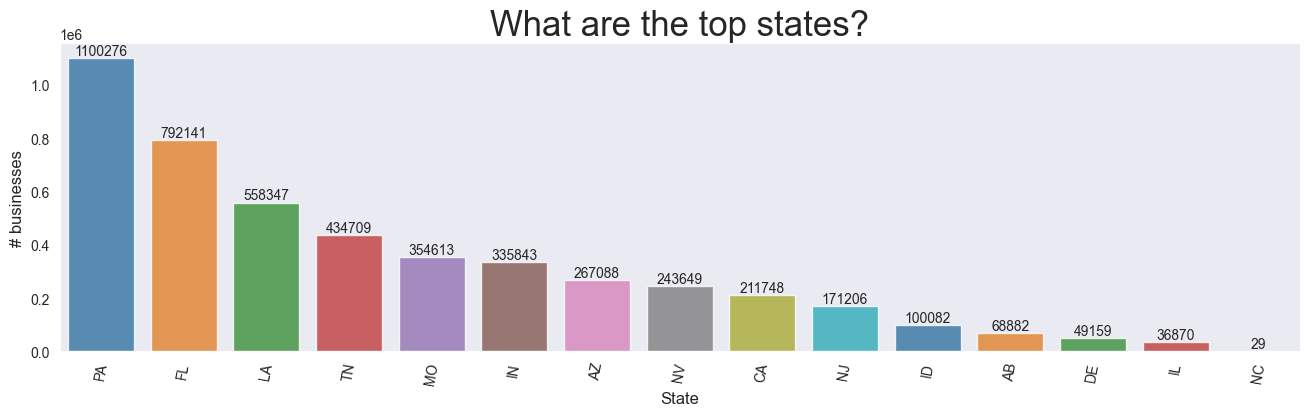

In [18]:
# prep for chart
x = combined_df["state"].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:15]

# chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=color)
plt.title("What are the top states?", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel("# businesses", fontsize=12)
plt.xlabel("State", fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_24840\164744378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)
C:\Users\risha\AppData\Local\Temp\ipykernel_24840\164744378.py:8: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)


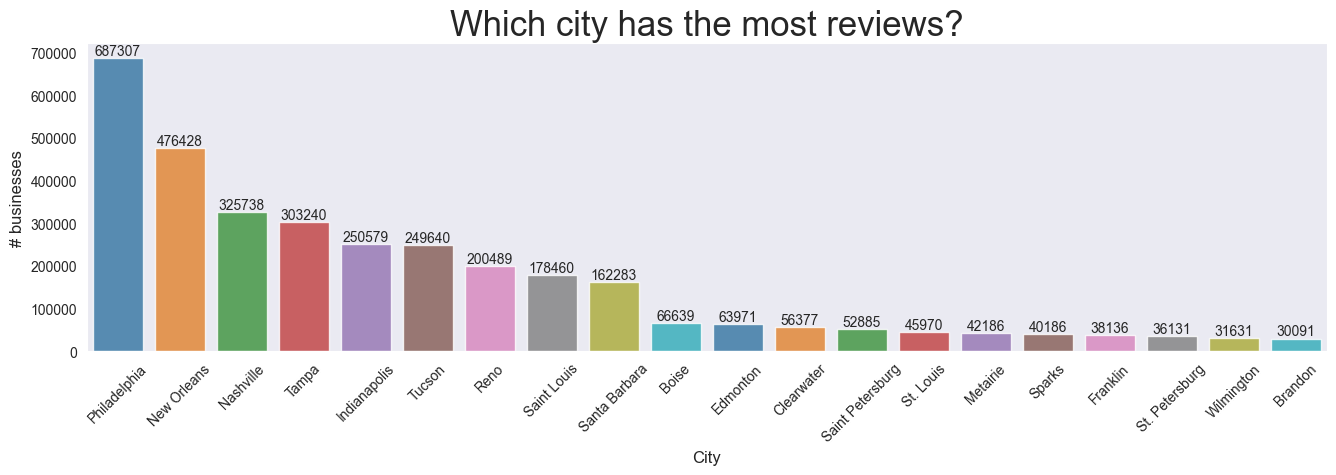

In [19]:
# Get the distribution of the ratings
x = combined_df["city"].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=color)
plt.title("Which city has the most reviews?", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel("# businesses", fontsize=12)
plt.xlabel("City", fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [20]:
combined_df["date"] = pd.to_datetime(combined_df["date"])

C:\Users\risha\AppData\Local\Temp\ipykernel_24840\503730178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)
C:\Users\risha\AppData\Local\Temp\ipykernel_24840\503730178.py:6: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,palette=color)


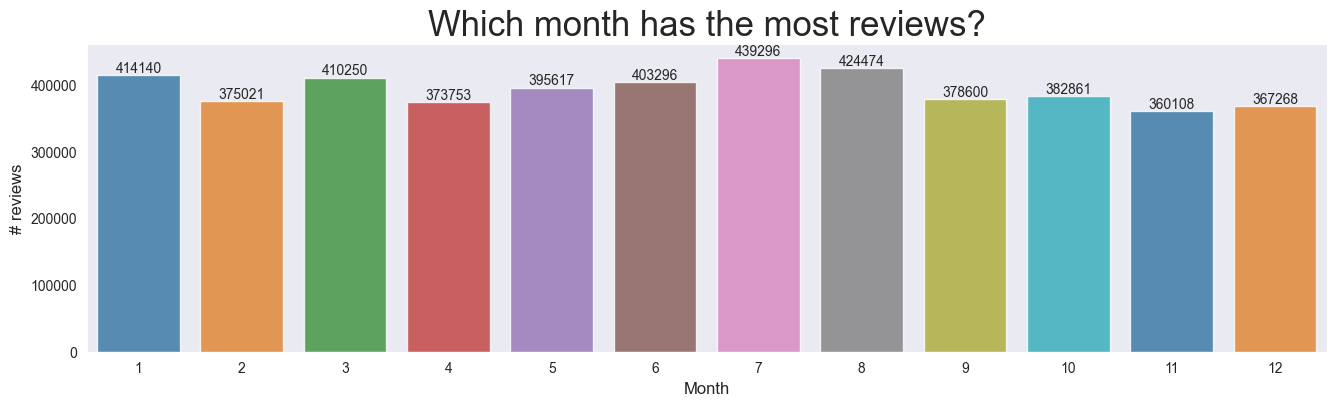

In [21]:
# Get the distribution of the reviews by month
x = combined_df.groupby(combined_df["date"].dt.month)["business_id"].count()

# chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=color)
plt.title("Which month has the most reviews?", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.ylabel("# reviews", fontsize=12)
plt.xlabel("Month", fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [35]:
def get_day(dic, day):
    try:
        return dic[day]
    except:
        return "Closed"


combined_df["Monday"] = combined_df["hours"].apply(lambda x: get_day(x, "Monday"))
combined_df["Tuesday"] = combined_df["hours"].apply(lambda x: get_day(x, "Tuesday"))
combined_df["Wednesday"] = combined_df["hours"].apply(lambda x: get_day(x, "Wednesday"))
combined_df["Thursday"] = combined_df["hours"].apply(lambda x: get_day(x, "Thursday"))
combined_df["Friday"] = combined_df["hours"].apply(lambda x: get_day(x, "Friday"))
combined_df["Saturday"] = combined_df["hours"].apply(lambda x: get_day(x, "Saturday"))
combined_df["Sunday"] = combined_df["hours"].apply(lambda x: get_day(x, "Sunday"))

In [39]:
combined_df["attributes"].head(2)

0    {'NoiseLevel': 'u'average'', 'HasTV': 'False',...
1    {'RestaurantsReservations': 'True', 'BusinessP...
Name: attributes, dtype: object

In [40]:
attributes_expanded = json_normalize(
    combined_df["attributes"].dropna().tolist()
).add_prefix("attributes_")
combined_df = combined_df.drop("attributes", axis=1).join(attributes_expanded)

In [43]:
combined_df.head(4)

,review_id,user_id,business_id,stars review,text,date,name,address,city,state,...,attributes_DriveThru,attributes_Corkage,attributes_BYOB,attributes_BestNights,attributes_Open24Hours,attributes_DietaryRestrictions,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_HairSpecializesIn,attributes_AcceptsInsurance
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,2481 Grant Ave,Philadelphia,PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,2549 Banks St,New Orleans,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
